# Naive Bayes Classifier

In [1]:
import nltk 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import string
import gensim
import time

[nltk_data] Downloading package stopwords to /home/cnn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cnn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))

cat
cactus
goose
rock
good
best


# Equation for Naive Bayes classifier

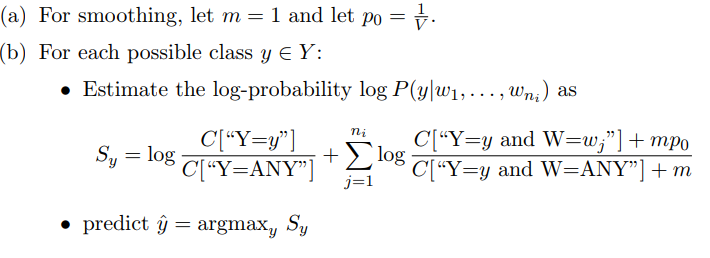

In [4]:
with open('train.txt') as f:
    content = f.readlines()

In [5]:
# for timing the data training
start = time.time()

In [6]:
train_dict = {}
train_label_dict = {}
vocab = set()

for line in content:
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    text = sentence.split()
    
    # remove the stop 
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    for label in labels.split(','):
        label = label.strip()
        
        # for class probability
        if label not in train_label_dict:
            train_label_dict[label] = 1
        else:
            train_label_dict[label] += 1
            
        # for dictionary of each class
        if label not in train_dict:
            train_dict[label] = {}
        for w in text: # word count in each class
            if len(w)>3:
                if w not in train_dict[label]:
                    train_dict[label][w] = 1
                else:
                    train_dict[label][w] += 1 
            # adding to vocabulary 
            vocab.add(w)
            

In [7]:
prior_prob= {}
total_class_label = sum(train_label_dict.values())
for key in train_label_dict.keys():
    prior_prob[key] = np.log(train_label_dict[key] / total_class_label)
#prior_prob.values()

In [8]:
vocab_size  = len(vocab)
vocab = list(vocab)
vocab_size

374680

In [9]:
# total words in class
for class_label in train_dict.keys():
    total_class_words = sum(train_dict[class_label].values())
    train_dict[class_label]['words_in_class'] = total_class_words

In [10]:
end = time.time()
print('Time Takem for training is :', end - start)

Time Takem for training is : 64.3207688331604


In [11]:
train_dict['Main_Belt_asteroids']['words_in_class']

156295

In [12]:
train_corr = 0 # correct predictions
m = 1
v = vocab_size
for line in content:
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    
    text = sentence.split()
    # remove the stop 
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    
    # removing blank space at the end of class label
    true_labels = [label.strip() for label in labels.split(',')]
    prob_den = {}
    for class_label in train_dict.keys():
        total_words_class =  train_dict[class_label]['words_in_class']
        for word in text:
            if (word in train_dict[class_label]) and len(word):
                count_fo_w_in_class = train_dict[class_label][word]
            else:
                count_fo_w_in_class = 0
            # probability distribution fo each word
            try:
                prob_den[class_label]=prob_den[class_label]+np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
            except:
                prob_den[class_label]=np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
        prob_den[class_label] = prob_den[class_label] + prior_prob[class_label]
    max_prob = -10000000
    for class_label in prob_den.keys():
        if(prob_den[class_label] >= max_prob):
            pred_class = class_label
            max_prob = prob_den[class_label]
    if(pred_class in true_labels):
        train_corr = train_corr+1
        #print(true_labels," JGD ", pred_class)      

In [13]:
train_corr

206438

In [14]:
"""i = 0
for line in content:
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    
    text = sentence.split()
    # remove the stop 
    text = [word for word in text if word not in stopwords]
    
    #for label in labels.split(','):
    #    true_label = label.strip()
        
    true_labels = [label.strip() for label in labels.split(',')]
    prob_den = {}
    for class_label in train_dict.keys():
        for word in text:
            if (word in train_dict[class_label]) and len(word):
                try:
                    prob_den[class_label] = prob_den[class_label] + train_dict[class_label][word]
                except:
                    prob_den[class_label] = train_dict[class_label][word]
                    
                    
    max_prob = -10000000
    for class_label in prob_den.keys():
        if(prob_den[class_label] >= max_prob):
            pred_class = class_label
            max_prob = prob_den[class_label]
    if(pred_class in true_labels):
        i= i+1
        print(true_labels,"===", pred_class)"""

'i = 0\nfor line in content:\n    labels, sentence = line.split(\'\t\',1)\n    sentence = sentence.lower()\n    # removing links\n    sentence =  \' \'.join([x for x in sentence.split() if (\'<\' not in x) and (\'\\\' not in x)])\n    # removing numbers and punctuations\n    sentence = \'\'.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])\n    \n    text = sentence.split()\n    # remove the stop \n    text = [word for word in text if word not in stopwords]\n    \n    #for label in labels.split(\',\'):\n    #    true_label = label.strip()\n        \n    true_labels = [label.strip() for label in labels.split(\',\')]\n    prob_den = {}\n    for class_label in train_dict.keys():\n        for word in text:\n            if (word in train_dict[class_label]) and len(word):\n                try:\n                    prob_den[class_label] = prob_den[class_label] + train_dict[class_label][word]\n                except:\n                    prob_den[class_label] 

In [15]:
train_accuracy = train_corr / len(content) * 100
print("train accuracy of naive bayes classifier is = {}%".format(train_accuracy))

train accuracy of naive bayes classifier is = 96.01901421880305%


In [16]:
train_corr / len(content) * 100

96.01901421880305

In [17]:
len(content)

214997

In [18]:
# reading the dev test dataset file 
with open('dev.txt') as f:
    content_dev = f.readlines()

In [19]:
dev_corr = 0 # correct predictions
m = 1
v = vocab_size
for line in content_dev:
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    
    text = sentence.split()
    # remove the stop 
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    
    # removing blank space at the end of class label
    true_labels = [label.strip() for label in labels.split(',')]
    prob_den = {}
    for class_label in train_dict.keys():
        total_words_class =  train_dict[class_label]['words_in_class']
        for word in text:
            if (word in train_dict[class_label]) and len(word):
                count_fo_w_in_class = train_dict[class_label][word]
            else:
                count_fo_w_in_class = 0
            # probability distribution fo each word
            try:
                prob_den[class_label]=prob_den[class_label]+np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
            except:
                prob_den[class_label]=np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
        prob_den[class_label] = prob_den[class_label] + prior_prob[class_label]
    max_prob = -10000000
    for class_label in prob_den.keys():
        if(prob_den[class_label] >= max_prob):
            pred_class = class_label
            max_prob = prob_den[class_label]
    if(pred_class in true_labels):
        dev_corr = dev_corr +1
        #print(true_labels," JGD ", pred_class)      

In [20]:
dev_accuracy = dev_corr/len(content_dev)
print("Dev set accuracy of naive bayes classifier is= {}%".format(dev_accuracy*100))

Dev set accuracy of naive bayes classifier is= 73.55318145600599%


In [21]:
# reading the test dataset file file 
with open('test.txt') as f:
    content_test = f.readlines()

In [22]:
test_corr = 0 # correct predictions
m = 1
v = vocab_size
for line in content_test:
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    
    text = sentence.split()
    # remove the stop 
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    
    # removing blank space at the end of class label
    true_labels = [label.strip() for label in labels.split(',')]
    prob_den = {}
    for class_label in train_dict.keys():
        total_words_class =  train_dict[class_label]['words_in_class']
        for word in text:
            if (word in train_dict[class_label]) and len(word):
                count_fo_w_in_class = train_dict[class_label][word]
            else:
                count_fo_w_in_class = 0
            # probability distribution fo each word
            try:
                prob_den[class_label]=prob_den[class_label]+np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
            except:
                prob_den[class_label]=np.log((count_fo_w_in_class + m/v)/(total_words_class+1))
        prob_den[class_label] = prob_den[class_label] + prior_prob[class_label]
    max_prob = -10000000
    for class_label in prob_den.keys():
        if(prob_den[class_label] >= max_prob):
            pred_class = class_label
            max_prob = prob_den[class_label]
    if(pred_class in true_labels):
        test_corr = test_corr +1
        #print(true_labels," JGD ", pred_class)      

In [23]:
test_accuracy = test_corr/len(content_test)
print("test_accuracy of naive bayes classifieris= {}%".format(test_accuracy*100))

test_accuracy of naive bayes classifieris= 77.44441110777744%
